In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb

sns.set()

In [2]:
import random
import math

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def create_score_sheet(method, y_true, y_pred):
    return {"Method":method, 
            "accuracy":accuracy_score(y_true, y_pred), 
            "f1_score": f1_score(y_true, y_pred), 
            "presicion": precision_score(y_true, y_pred), 
            "recall": recall_score(y_true, y_pred)}

accuracy                f1_score               presicion  \
Method Graph Laplacian     MBO Graph Laplacian     MBO Graph Laplacian   
N0                                                                       
5                70.2%  95.05%          82.49%  96.35%           70.2%   
10               74.9%  99.08%          84.87%  99.34%          73.72%   
20              91.35%  99.48%          94.25%  99.63%          89.12%   
40              95.87%  99.67%           97.2%  99.77%          94.56%   
80              97.62%  99.64%          98.41%  99.76%          96.88%   
160             98.24%  99.71%           98.9%  99.82%          97.83%   

                        recall          
Method     MBO Graph Laplacian     MBO  
N0                                      
5       100.0%          100.0%  92.95%  
10      100.0%          100.0%   98.7%  
20      99.27%          100.0%  100.0%  
40      100.0%          100.0%  99.55%  
80      100.0%          100.0%  99.52%  
160     99.63%          100.0%  100.0%

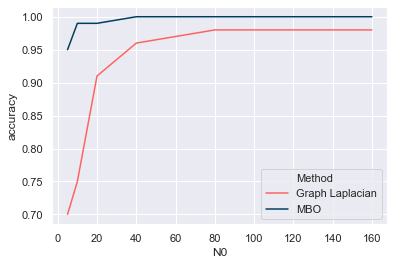

In [24]:
df = pd.read_csv("output/3_Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: "{}%".format(round(x*100, 2)))
df.rename(columns={"N":"N0"}, inplace=True)
display(pd.pivot_table(df, values=["accuracy", "f1_score", "presicion", "recall"], index=["N0"],
                    columns=['Method'], aggfunc=np.sum))

colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/3_Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
display(sns.lineplot(data=df, x="N0", y="accuracy", hue="Method"))

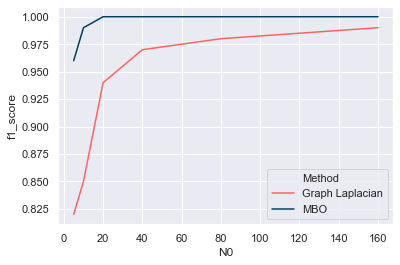

In [23]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/3_Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
display(sns.lineplot(data=df, x="N0", y="f1_score", hue="Method"))

## Data 1

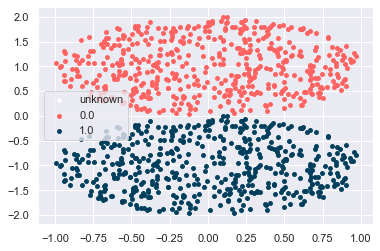

In [3]:
a = np.random.random(500) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(500))
blue = [[x,y-1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
red = [[x,y+1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

## Balanced Class

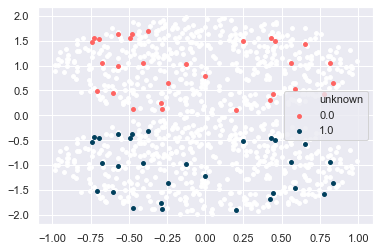

In [29]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

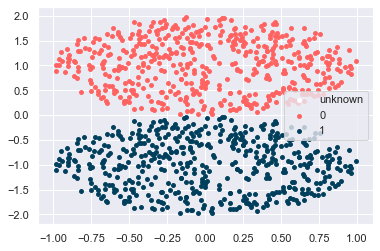

In [30]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.5064655172413793
Interation 1 error 0.0


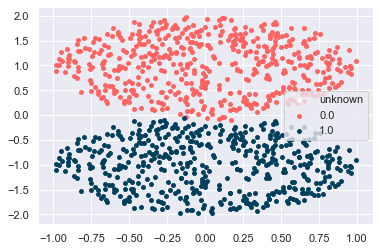

In [31]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

## Unbalanced Class

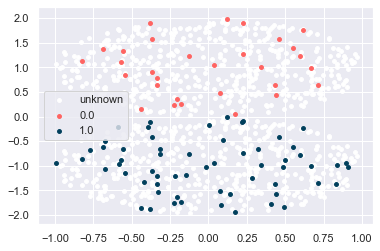

In [4]:
X0 = list(blue[:60]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:60] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[60:]) + list(red[30:])

plot(X0, Y0, X1)

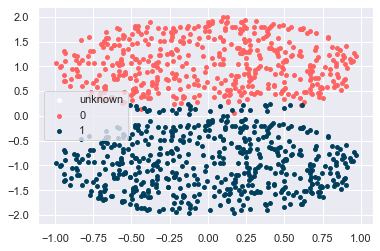

In [5]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.49672489082969434
Interation 1 error 0.0


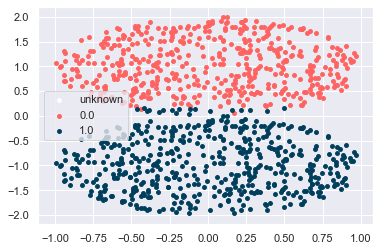

In [6]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

N Blue : 5 N Red : 5
Graph Laplacian


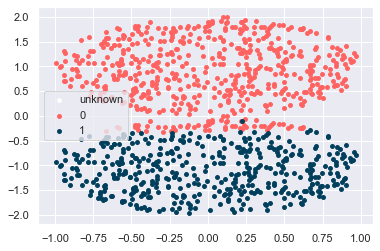

None

MBO
Interation 0 error 0.5512249443207127
Interation 1 error 0.0


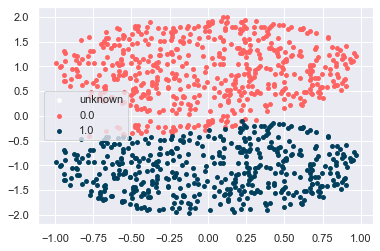

None

N Blue : 10 N Red : 10
Graph Laplacian


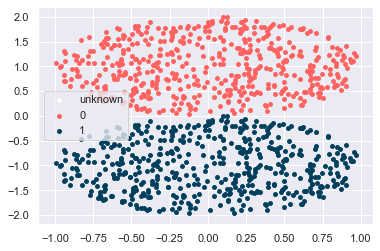

None

MBO
Interation 0 error 0.5
Interation 1 error 0.0


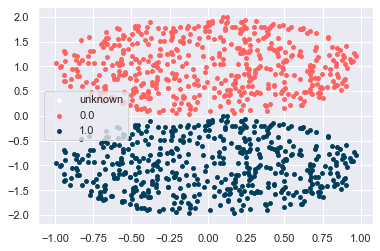

None

N Blue : 20 N Red : 20
Graph Laplacian


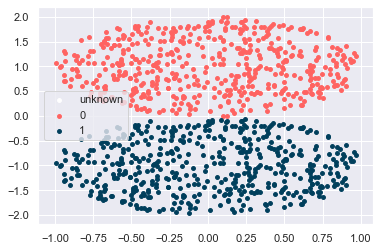

None

MBO
Interation 0 error 0.502092050209205
Interation 1 error 0.0


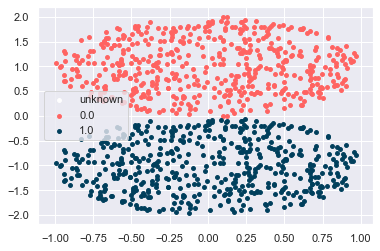

None

N Blue : 40 N Red : 40
Graph Laplacian


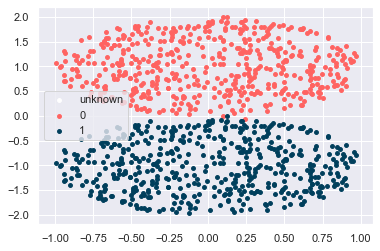

None

MBO
Interation 0 error 0.5054945054945055
Interation 1 error 0.0


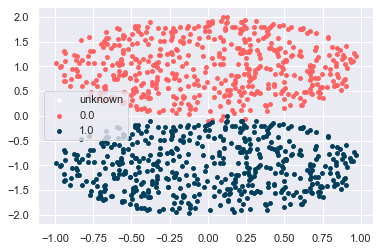

None

N Blue : 80 N Red : 80
Graph Laplacian


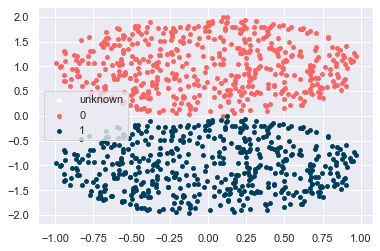

None

MBO
Interation 0 error 0.5
Interation 1 error 0.0


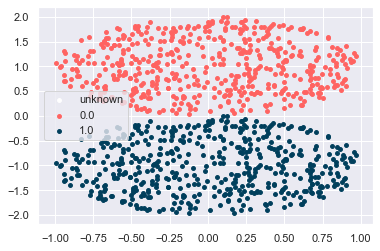

None

N Blue : 160 N Red : 160
Graph Laplacian


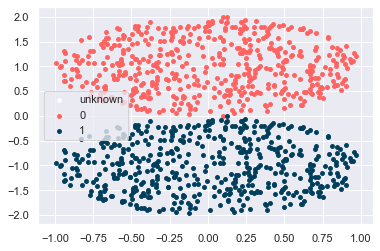

None

MBO
Interation 0 error 0.5014749262536873
Interation 1 error 0.0


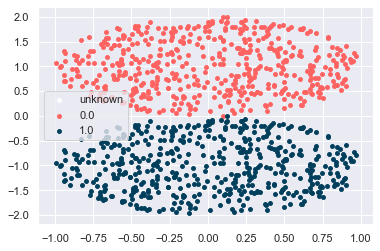

None

In [7]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [8]:
df = pd.DataFrame(result)
df.to_csv("output/3_Imbalanced N 1000.csv", encoding="utf-8", index=False)
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.938384,0.934338,1.0,0.876768,5
1,MBO,0.953535,0.951271,1.0,0.907071,5
2,Graph Laplacian,1.000000,1.000000,1.0,1.000000,10
3,MBO,1.000000,1.000000,1.0,1.000000,10
4,Graph Laplacian,0.997917,0.997912,1.0,0.995833,20
5,MBO,0.997917,0.997912,1.0,0.995833,20
6,Graph Laplacian,0.997826,0.997821,1.0,0.995652,40
7,MBO,0.994565,0.994536,1.0,0.989130,40
8,Graph Laplacian,0.998810,0.998808,1.0,0.997619,80
9,MBO,1.000000,1.000000,1.0,1.000000,80


In [18]:
df = pd.read_csv("output/3_Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: "{}%".format(round(x*100, 2)))
df.rename(columns={"N":"N0"}, inplace=True)
pd.pivot_table(df, values=["accuracy", "f1_score", "presicion", "recall"], index=["N0"],
                    columns=['Method'], aggfunc=np.sum)

accuracy                f1_score               presicion  \
Method Graph Laplacian     MBO Graph Laplacian     MBO Graph Laplacian   
N0                                                                       
5               93.84%  95.35%          93.43%  95.13%          100.0%   
10              100.0%  100.0%          100.0%  100.0%          100.0%   
20              99.79%  99.79%          99.79%  99.79%          100.0%   
40              99.78%  99.46%          99.78%  99.45%          100.0%   
80              99.88%  100.0%          99.88%  100.0%          100.0%   
160             99.85%  99.85%          99.85%  99.85%          100.0%   

                        recall          
Method     MBO Graph Laplacian     MBO  
N0                                      
5       100.0%          87.68%  90.71%  
10      100.0%          100.0%  100.0%  
20      100.0%          99.58%  99.58%  
40      100.0%          99.57%  98.91%  
80      100.0%          99.76%  100.0%  
160     100.0%          99.71%  99.71%

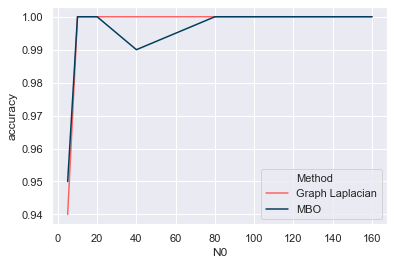

In [20]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/3_Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="accuracy", hue="Method")

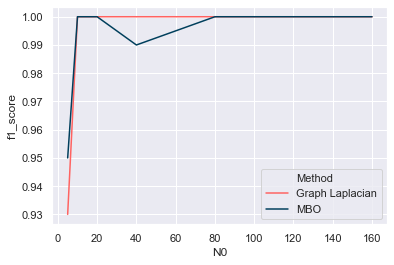

In [22]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/3_Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="f1_score", hue="Method")

## Different Density

### 3:7

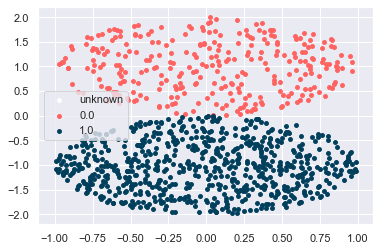

In [9]:
a = np.random.random(700) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(700))
blue = [[x,y-1] for x,y in zip(r * np.cos(a), r * np.sin(a))]

a = np.random.random(300) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(300))
red = [[x,y+1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

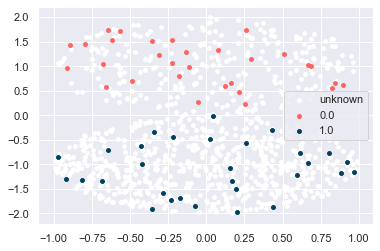

In [10]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

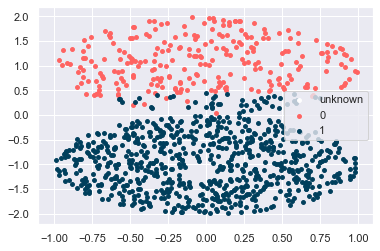

In [37]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.3560606060606061
Interation 1 error 0.0


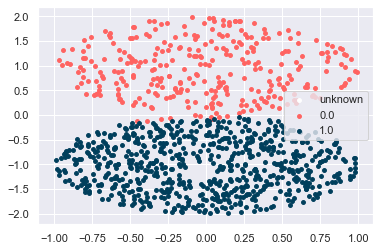

In [38]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

N Blue : 5 N Red : 5
Graph Laplacian


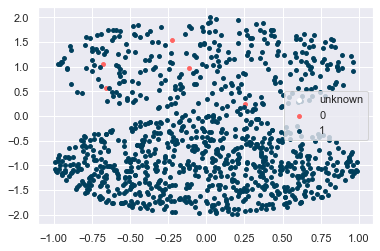

None

MBO
Interation 0 error 0.3831269349845201
Interation 1 error 0.0


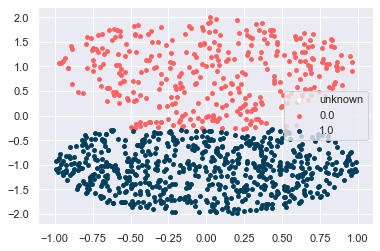

None

N Blue : 10 N Red : 10
Graph Laplacian


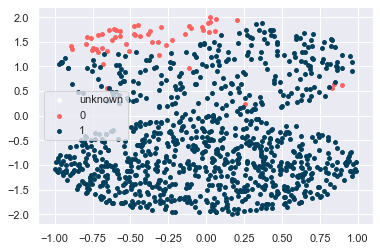

None

MBO
Interation 0 error 0.35976505139500736
Interation 1 error 0.0


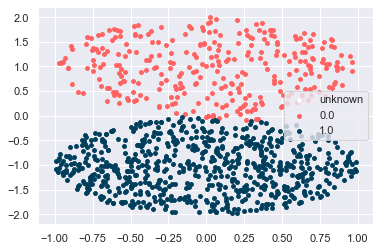

None

N Blue : 20 N Red : 20
Graph Laplacian


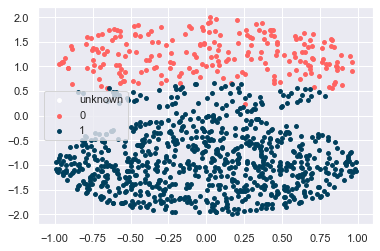

None

MBO
Interation 0 error 0.35036496350364965
Interation 1 error 0.0


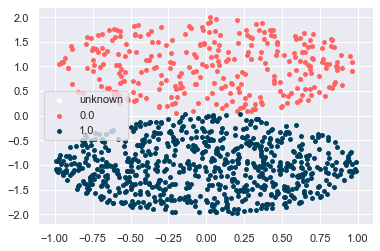

None

N Blue : 40 N Red : 40
Graph Laplacian


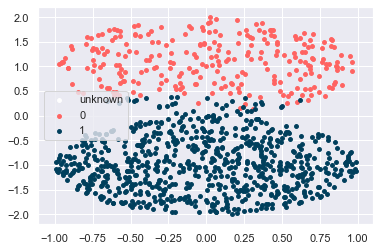

None

MBO
Interation 0 error 0.350076103500761
Interation 1 error 0.0


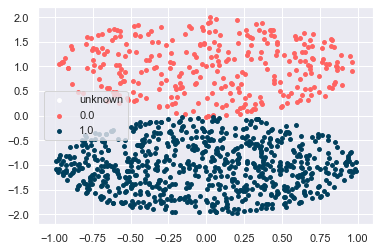

None

N Blue : 80 N Red : 80
Graph Laplacian


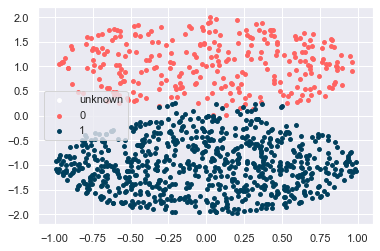

None

MBO
Interation 0 error 0.34035656401944897
Interation 1 error 0.0


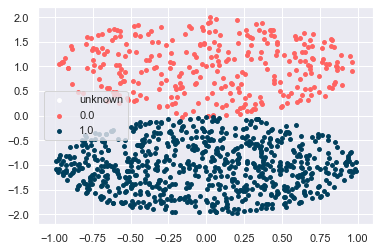

None

N Blue : 160 N Red : 160
Graph Laplacian


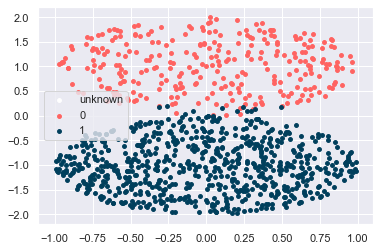

None

MBO
Interation 0 error 0.31365313653136534
Interation 1 error 0.0


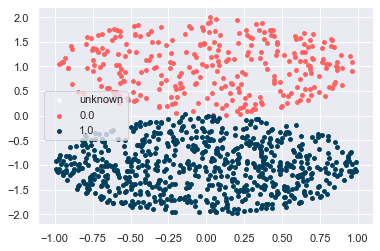

None

In [11]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [12]:
df = pd.DataFrame(result)
df.to_csv("output/3_Balanced initial_imbalance result 7_3.csv", encoding="utf-8", index=False)
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.702020,0.824926,0.702020,1.000000,5
1,MBO,0.950505,0.963460,1.000000,0.929496,5
2,Graph Laplacian,0.748980,0.848708,0.737179,1.000000,10
3,MBO,0.990816,0.993435,1.000000,0.986957,10
4,Graph Laplacian,0.913542,0.942481,0.891219,1.000000,20
5,MBO,0.994792,0.996337,0.992701,1.000000,20
6,Graph Laplacian,0.958696,0.972018,0.945559,1.000000,40
7,MBO,0.996739,0.997722,1.000000,0.995455,40
8,Graph Laplacian,0.976190,0.984127,0.968750,1.000000,80
9,MBO,0.996429,0.997575,1.000000,0.995161,80


N Blue : 5 N Red : 10
Graph Laplacian


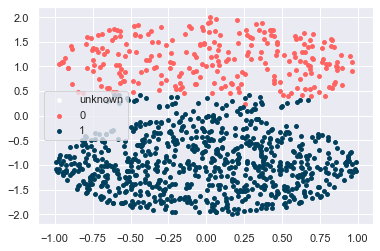

None

MBO
Interation 0 error 0.3890205371248025
Interation 1 error 0.0


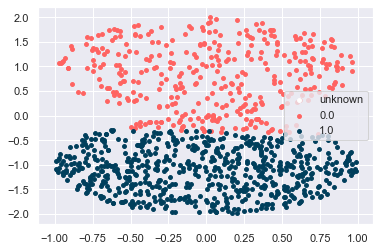

None

N Blue : 10 N Red : 20
Graph Laplacian


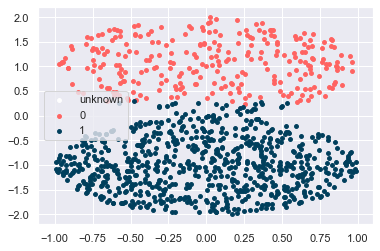

None

MBO
Interation 0 error 0.3641141141141141
Interation 1 error 0.0


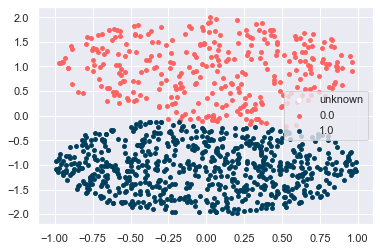

None

N Blue : 20 N Red : 40
Graph Laplacian


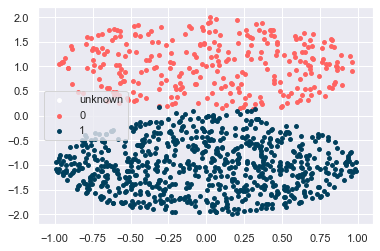

None

MBO
Interation 0 error 0.3671875
Interation 1 error 0.0


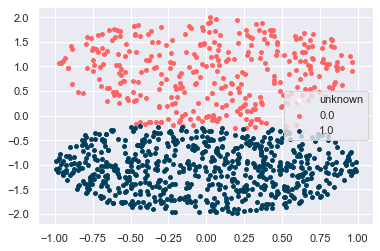

None

N Blue : 40 N Red : 80
Graph Laplacian


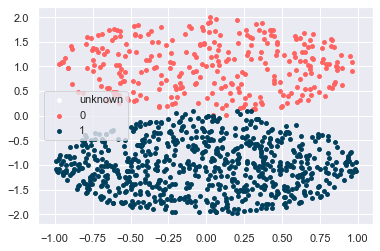

None

MBO
Interation 0 error 0.35714285714285715
Interation 1 error 0.0


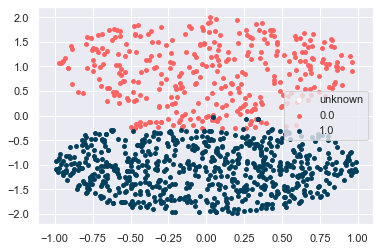

None

N Blue : 80 N Red : 160
Graph Laplacian


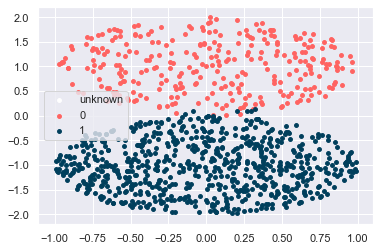

None

MBO
Interation 0 error 0.3187919463087248
Interation 1 error 0.0


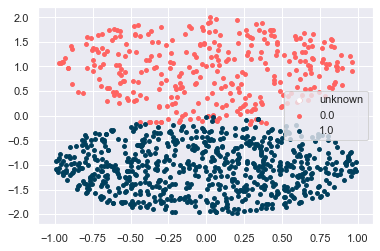

None

N Blue : 160 N Red : 320
Graph Laplacian


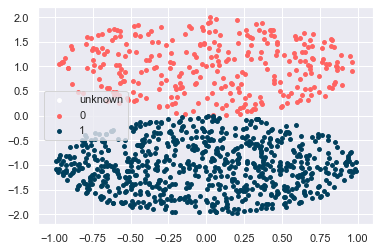

None

MBO
Interation 0 error 0.2616279069767442
Interation 1 error 0.0


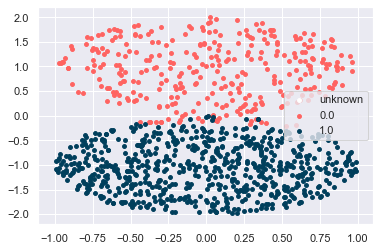

None

In [14]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:2*N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:2*N]
    X1 = list(blue[N:]) + list(red[2*N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[2*N:]
    
    print("N Blue :", N, "N Red :", 2*N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [15]:
df = pd.DataFrame(result)
df.to_csv("output/3_imbalanced initial_imbalance result 7_3.csv", encoding="utf-8", index=False)
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.950254,0.965949,0.934140,1.000000,5
1,MBO,0.937056,0.953313,1.000000,0.910791,5
2,Graph Laplacian,0.968041,0.978030,0.957004,1.000000,10
3,MBO,0.975258,0.982301,1.000000,0.965217,10
4,Graph Laplacian,0.987234,0.991254,0.982659,1.000000,20
5,MBO,0.957447,0.969697,1.000000,0.941176,20
6,Graph Laplacian,0.990909,0.993976,0.988024,1.000000,40
7,MBO,0.950000,0.965517,1.000000,0.933333,40
8,Graph Laplacian,0.990789,0.994387,0.988836,1.000000,80
9,MBO,0.968421,0.980263,1.000000,0.961290,80
